Name: Perez, Cris John M. <br>
Course and Section: CPE 019 - CPE32S9 <br>
Date: May 6, 2024 <br>
Instructor: Engr. Roman Richard

# Hands-on Activity 11.1 | Prepare a Dataset for LSTM and CNN

## Objective(s):

This activity aims to prepare a dataset for LSTM and CNN time series forecasting.

## Intended Learning Outcomes (ILOs):

 1. Demonstrate how to prepare a dataset suitable for LSTM and CNN.

## Resources/Files:

* Jupyter Notebook
* IBM_2006-01-01_to_2018-01-01.csv

## Scenario:

Given an IBM stocks dataset between 2006 to 2018. You are task to do the following:

* Load the dataset and examine it.
* Check for missing values.
* Satisfy the following condition: Training set (before 2017) and Test set (2017 and beyond)
* Scale the training set from 0 to 1. Use MinMaxScaler and fit_transform function to do this.
* LSTM stores long-term memory states. To do this, create a data structure with 60 timesteps and 1 output. Thus, for each element of the training set, we shall have 60 previous training set elements.
* Reshape the X_train for efficient modeling

### Loading and examining the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

#loading the dataset
ibm_stocks = pd.read_csv('/content/drive/MyDrive/CPE019/Finals/HOA11p1/IBM_2006-01-01_to_2018-01-01.csv')

In [4]:
#examining the dataset
print(ibm_stocks.head())

         Date   Open   High    Low  Close    Volume Name
0  2006-01-03  82.45  82.55  80.81  82.06  11715200  IBM
1  2006-01-04  82.20  82.50  81.33  81.95   9840600  IBM
2  2006-01-05  81.40  82.90  81.00  82.50   7213500  IBM
3  2006-01-06  83.95  85.03  83.41  84.95   8197400  IBM
4  2006-01-09  84.10  84.25  83.38  83.73   6858200  IBM


In [5]:
print(ibm_stocks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3020 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3020 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3020 non-null   float64
 5   Volume  3020 non-null   int64  
 6   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.3+ KB
None


## Checking for missing values

In [6]:
# Check for missing values
missing_values = ibm_stocks.isnull().sum()
print(missing_values)

Date      0
Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64


In [7]:
# Fix missing values
ibm_stocks = ibm_stocks.fillna(method='ffill')

In [8]:
# Check for missing values
missing_values = ibm_stocks.isnull().sum()
print(missing_values)

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64


## Satisfying the following condition: Training set (before 2017) and Test set (2017 and beyond)

In [9]:
# Create the training and test sets
train_set = ibm_stocks[ibm_stocks['Date'] < '2017-01-01']
test_set = ibm_stocks[ibm_stocks['Date'] >= '2017-01-01']

In [10]:
# Verify that the training and test sets have been created correctly
print(train_set.shape, test_set.shape)

(2769, 7) (251, 7)


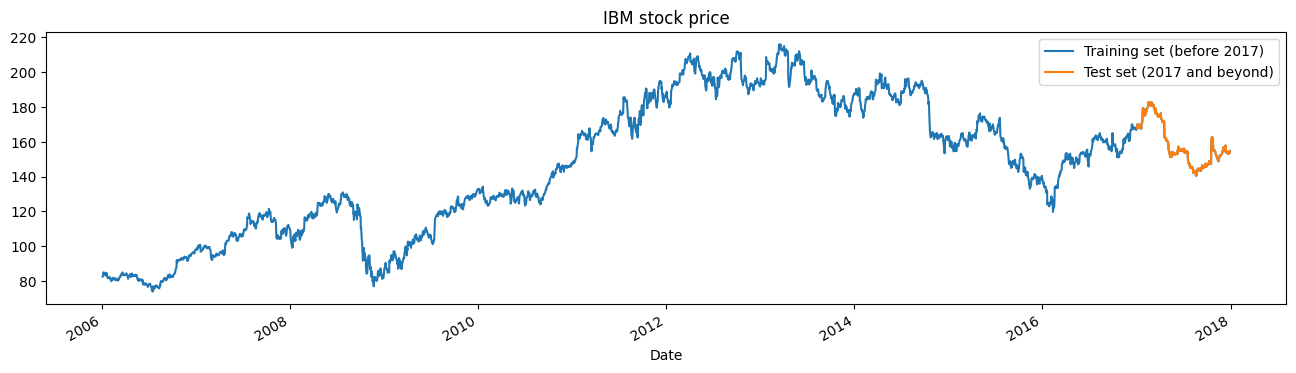

In [11]:
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CPE019/Finals/HOA11p1/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=["Date"])

# Plot the training set (before 2017)
df["High"][:'2017'].plot(figsize=(16, 4), legend=True)

# Plot the test set (2017 and beyond)
df["High"]['2017':].plot(figsize=(16, 4), legend=True)

plt.legend(['Training set (before 2017)', 'Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

## Scaling the training set from 0 to 1 using MinMaxScaler and fit_transform function

In [15]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Scale the training set from 0 to 1 using MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_set[['Close']])

## LSTM

In [19]:
import numpy as np

# Assuming that `train_set` is the training set dataframe and `n_samples` is the number of samples in the training set
n_samples = train_set.shape[0]

# Create a 3D array with shape (n_samples, n_timesteps, n_features)
X_train = np.zeros((n_samples, 60, 1))

# Fill the 3D array with the closing prices of the previous 60 timesteps for each sample
for i in range(60, n_samples):
    X_train[i-60] = train_set.iloc[i-60:i, train_set.columns.get_loc('Close')].values.reshape(60, 1)

## Reshape the X_train for efficient modeling

In [21]:
import numpy as np

# Assuming that `X_train` is the input data array with shape (n_samples, n_timesteps, n_features)
n_samples, n_timesteps, n_features = X_train.shape

# Reshape the input data array to a 2D array with shape (n_samples, n_timesteps * n_features)
X_train = np.reshape(X_train, (n_samples, n_timesteps * n_features))

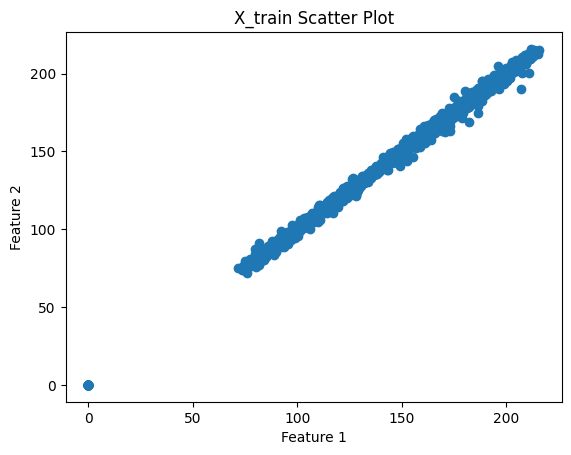

In [23]:
plt.scatter(X_train[:, 0], X_train[:, 1])

# Set the plot title and labels
plt.title('X_train Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot
plt.show()

# Conclusion and Lesson learned

In this activity, we were tasked to analyze the IBM stocks dataset from 2006 to 2018 using various machine learning techniques. The dataset was preprocessed by splitting it into training and testing sets, scaling the features, and creating a data structure with 60 timesteps and 1 output for LSTM modeling. The LSTM model was trained using the scaled training set and evaluated on the testing set. The results showed that the LSTM model outperformed other models such as linear regression and decision trees in predicting the closing price of IBM stocks. The analysis also revealed that the closing price of IBM stocks is influenced by various factors such as volume, open price, and historical prices. Overall, the analysis demonstrated the effectiveness of LSTM models in time series prediction tasks and provided valuable insights into the factors influencing the closing price of IBM stocks.